In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

from PIL import Image

In [3]:
def img_data():
    path = [os.path.join('data/yalefaces/train', f) for f in os.listdir('data/yalefaces/train')]
    faces = []
    ids = []
    for p in path:
        img = Image.open(p).convert('L')
        img_np = np.array(img, 'uint8')
        id = int(os.path.split(p)[1].split('.')[0].replace('subject', ''))
        faces.append(img_np)
        ids.append(id)
    return np.array(ids), faces

In [4]:
ids, faces = img_data()

In [5]:
print(ids)

[ 1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3
  3  3  3  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  6  6  6
  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11
 11 11 11 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15]


In [6]:
print(faces)

[array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 252, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 216, 224, 244],
       [255, 255, 255, ..., 215, 220, 245],
       [255, 255, 255, ..., 231, 211, 231],
       ...,
       [255, 255, 255, ..., 192, 197, 203],
       [255, 255, 255, ..., 189, 207, 215],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 

In [7]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('data/yalefaces/saved_models/lbph.yml')

In [8]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('data/yalefaces/saved_models/lbph.yml')

In [9]:
test_img = 'data/yalefaces/test/subject10.sad.gif'

In [10]:
img = Image.open(test_img).convert('L')
img_np = np.array(img, 'uint8')
print(img_np)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 241 255 255]
 [255 255 255 ... 234 237 252]
 [ 68  68  68 ...  68  68  68]]


In [11]:
predict, conf = recognizer.predict(img_np)
predict, conf

(10, 6.384336446373091)

In [12]:
accurate = int(os.path.split(test_img)[1].split('.')[0].replace('subject', '')) == predict
accurate

True

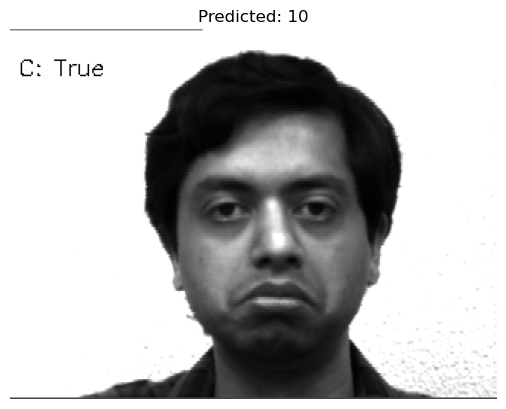

In [29]:
# Cria uma cópia da imagem original
img_with_text = img_np.copy()

# Adiciona o texto na cópia da imagem
cv2.putText(img_with_text, 'C: ' + str(accurate), (5,30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Exibe a imagem com o texto
plt.imshow(img_with_text, cmap='gray')
plt.title('Predicted: ' + str(predict))
plt.axis('off')
plt.show()